In [86]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from gender_detector import GenderDetector

In [87]:
headers = ['name','title','department','salary']
chicago = pd.read_csv('chicago_city_salaries.csv', header=False, names=headers)
chicago.dropna(how="all", inplace=True)
chicago['salary'] = chicago['salary'].apply(lambda x: float(x.replace('$', '')))

In [88]:
chicago.count()

name          32181
title         32181
department    32181
salary        32181
dtype: int64

In [89]:
us_detector = GenderDetector('us')
ar_detector = GenderDetector('ar')
uk_detector = GenderDetector('uk')
uy_detector = GenderDetector('uy')    

In [90]:
def guess_name(name, country):
    first_name = name.split(',')[0]
    func_options = {'us': us_detector,
                         'ar': ar_detector,
                         'uk': uk_detector,
                         'uy': uy_detector
                        }
    return func_options[country].guess(first_name)

In [91]:
chicago['gender'] = chicago.apply(lambda row: guess_name(row['name'], 'us'), axis=1)
chicago['gender'] = chicago.apply(lambda row: guess_name(row['name'], 'uk'), axis=1)
chicago['gender'] = chicago.apply(lambda row: guess_name(row['name'], 'ar'), axis=1)
chicago['gender'] = chicago.apply(lambda row: guess_name(row['name'], 'uy'), axis=1)

In [92]:
with_name = chicago[chicago['gender'] != 'unknown']

In [93]:
with_name.count()

name          6735
title         6735
department    6735
salary        6735
gender        6735
dtype: int64

In [94]:
police_officers = with_name[(with_name['department'] == 'POLICE') & (with_name['title'] == 'POLICE OFFICER') ]

In [95]:
police_officers[:3]

,name,title,department,salary,gender
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,80778,male
2,"AARON, KARINA",POLICE OFFICER,POLICE,80778,male
31,"ABRAHAM, NANCY A",POLICE OFFICER,POLICE,46206,male


In [96]:
police_officer_salary = police_officers.groupby(['gender', 'title']).agg({'salary': np.mean})

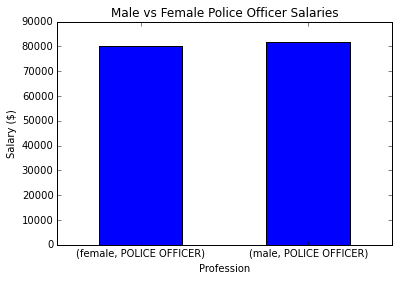

In [97]:
police_officer_salary.plot(kind='bar', legend=None)
plt.xlabel('Profession')
plt.ylabel('Salary ($)')
plt.xticks(rotation=0)
plt.title('Male vs Female Police Officer Salaries')

In [98]:
police_dept = with_name[(with_name['department'] == 'POLICE')]

In [99]:
police_dept_gender_salary = police_dept.groupby(['gender']).agg({'salary': np.mean})

In [100]:
police_dept_gender_salary[:3]

,salary
gender,
female,80580.063855
male,79348.002183


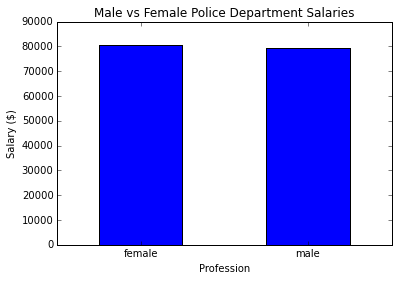

In [101]:
police_dept_gender_salary.plot(kind='bar', legend=None)
plt.xlabel('Profession')
plt.ylabel('Salary ($)')
plt.xticks(rotation=0)
plt.title('Male vs Female Police Department Salaries')